# **TokenRing**

---
**Условие:**

Задача состоит в построении простой модели доисторического сетевого протокола сети под названием TokenRing и исследовании его свойств.

 

1. Система состоит из N пронумерованных от 0 до N-1 узлов (потоков). Узлы упорядочены по порядковому номеру. После состояния N-1 следует узкл 0, т.е. узлы формируют кольцо. 

2. Соседние в кольце потоки могут обмениваться пакетами. Обмен возможен только по часовой стрелке. 

3. Каждый поток, получив пакет от предыдущего, отдает его следующему.

4. Пакеты не могут обгонять друг друга.

 

Необходимо исследовать пропускную способность сети (throughput) и характерное время задержки (latency) в зависимости от количества узлов N и количества пакетов P (1...N), находящихся в транзите одновременно.

Дополнительно нужно попытаться оптимизировать (улучшить) throughput или latency как в целом так и для отдельно взятых конкретных режимов (недогруженная сеть, перегруженная сеть) и исследовать влияние оптимизаций для одного режима на весь спектр режимов. Описывете историю оптимизации.

---

### **Описание модели**

DataPackage представляет собой строковые даннные, а также содержит информацию о времени отправки и времени получения пакета данных.

Node содержит в себе различную информацию о данных (общее количество данных, все данные изначально назначенные на данную вершину, данные полученные от предыдущей ноды, количество данных прошедших обработку), а также время обработки данных и указатель на следующий узел.

TokenRing представляет собой кольцо состоящее из узлов Node. Перед началом работы генерируется список нод и список данных. Каждый пакет данных назначается на одну ноду из списка.

После того, как пакеты данных будут равномерно распределены по кольцу, выполняется запуск потоков на кольце. При поступлении пакета данных на очередную ноду, выполняется его обработка, после чего нода рассылает свои собственные сообщения. 

ExecutionInfo - класс, собирающий информацию о выполнении экспериментов и сохраняющий полученные данные в файл.

### **Характеристики оборудования**

Для проведения экспериментов использовался ноутбук со следующими характеристиками:

* *Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz*

* *physical processor: 1*

* *cores: 4*

* *RAM: 8064428 KiB*



### **Throughput**

Пропускная способность сети рассчитывается, как отношение количества доставленных пакетов ко времени работы TokenRing.

### **Latency**

Задержка пакета данных рассчитывается, как разность между временем получения пакета получателем и временем отправки пакета отправителем.

### **Проведение экспериментов**

Исследуем зависимость Latency и Throughput от количества узлов и количества пакетов.

Выполним запуск программы для различных значений количества узлов в сети и различных значений количества пакетов.

Ниже приведена таблица с полученными результатами.

Время исполнения (time) и задержка (latency) приведены в миллисекундах. Пропускная способность (throughput) измеряется в количестве пакетов в миллисекунду.

In [51]:
import pandas as pd
df = pd.read_table('data.txt', sep=' ')
df
#print(df)

,nodesAmount,dataAmount,time,throughput,latency
0,5,10000,28.615563,349.460182,1.014395
1,5,10000,4.895186,2042.823296,0.577399
2,5,10000,7.255189,1378.323769,1.434601
3,5,10000,6.311192,1584.486734,0.627652
4,5,10000,7.077561,1412.916196,2.002377
...,...,...,...,...,...
635,30,910200,1067.571637,852.589155,735.535827
636,30,910200,1179.579372,771.630991,831.670145
637,30,910200,1067.011213,853.036959,777.356899
638,30,910200,1236.723205,735.977134,836.495439


Построим графики и проанализируем полученные результаты.

In [2]:
node_amount = []
i = 5
while i <= 30:
  node_amount.append(i)
  i += 5

In [3]:
import matplotlib.pyplot as plt

def draw_throughput(df):
  plt.figure(figsize=(10, 10))
  for amount in node_amount:
    part = df.loc[df["nodesAmount"] == amount].sort_values(by="dataAmount")
    plt.plot(part.dataAmount, part.throughput, label = "node amount = " + str(amount))
  plt.title("Зависимость пропускной способности от количества потоков и количества пакетов")
  plt.xlabel("Количество пакетов данных")
  plt.ylabel("throughput")
  plt.legend()
  plt.show()

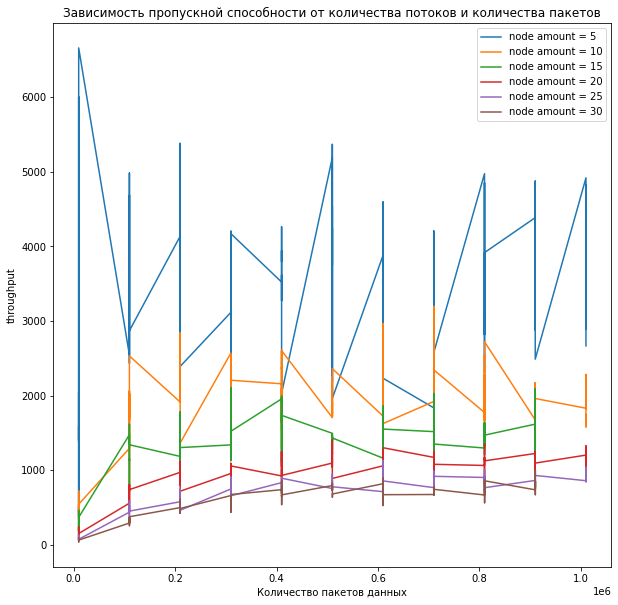

In [52]:
draw_throughput(df)

При увеличении числа потоков, пропускная способность падает. График выше наглядно демонстрирует данную закономерность. Это может происходить из-за того что с ростом числа потоков, каждому ядру приходится эмулировать все большее число потоков (на нашей машине 4 ядра).

In [6]:
def draw_latency(df):
  plt.figure(figsize=(10, 10))
  for amount in node_amount:
    part = df.loc[df["nodesAmount"] == amount].sort_values(by="dataAmount")
    plt.plot(part.dataAmount, part.latency, label = "node amount = " + str(amount))
  plt.title("Зависимость задержки пакета данных от количества потоков и количества пакетов")
  plt.xlabel("Количество пакетов данных")
  plt.ylabel("latency")
  plt.legend()
  plt.show()

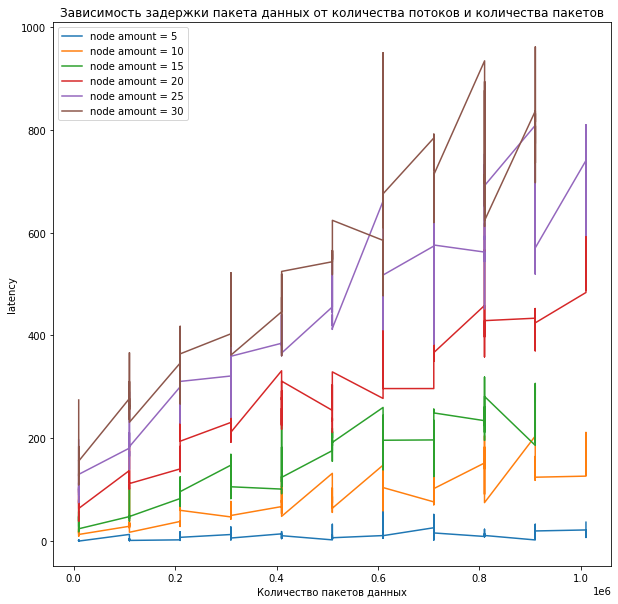

In [53]:
draw_latency(df)

При увеличении числа потоков, latency растет. Данный принцип наглядно демонстрируется на графике выше.

### **Оптимизация**

**Наблюдение 1:** 

Можно заметить, что в начале работы пока процессор не "пррогрет", обработка покетов данных происходит несколько медленнее. 

**Оптимизация 1:** 

Перед основными запусками и сбором информации с результатами, выполним запуски для прогрева процессора.

Выполним запуск TokenRing после оптимизации и посмотрим на результат.

In [11]:
df_opt1 = pd.read_table('dataopt1.txt', sep=' ')


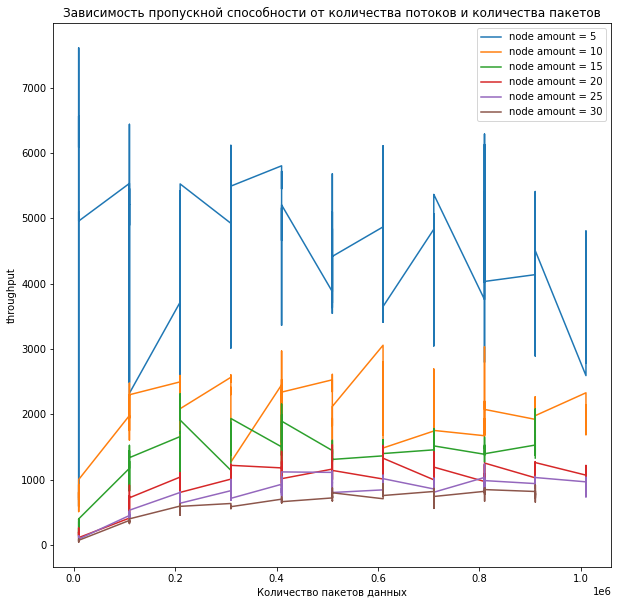

In [54]:
draw_throughput(df_opt1)

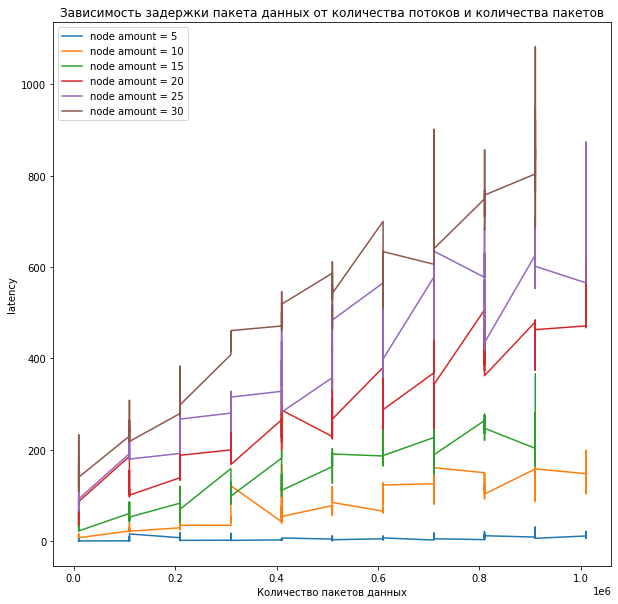

In [15]:
draw_latency(df_opt1)

Таким образом после оптимизации пропускная способность сети возрасла, а задержка пакета уменьшилась.

**Наблюдение 2:**

Представим ситуацию, что узел передал все данные, назначенный на него при инициализации кольца, и при этом пакеты данных от других узлов кольца не успели поступить на текущий узел. В таком случае окажется, что поток будет крутиться в цикле и потреблять ресурсы cpu.

**Оптимизация 2:**

При текущей реализации для хранения данных, поступивших с других нод используетс ConcurrentLinkedQueue. Чтобы решить обнаруженную проблему, можно заменить ConcurrentLinkedQueue на LinkedBlockingQueue. Таким образом, поток будет блокироваться в случае когда очередь пуста, что нам и нужно.

Продемонстрируем результаты запуска оптимизированной программы на графиках.




In [55]:
df_opt2 = pd.read_table('dataopt2.txt', sep=' ')


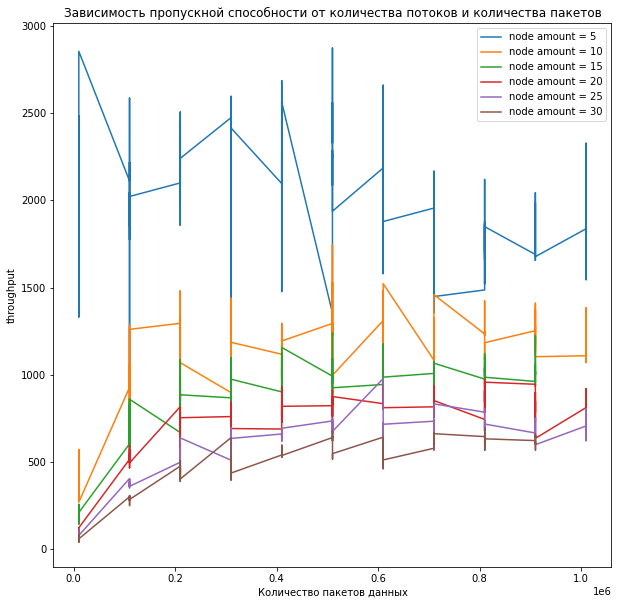

In [48]:
draw_throughput(df_opt2)

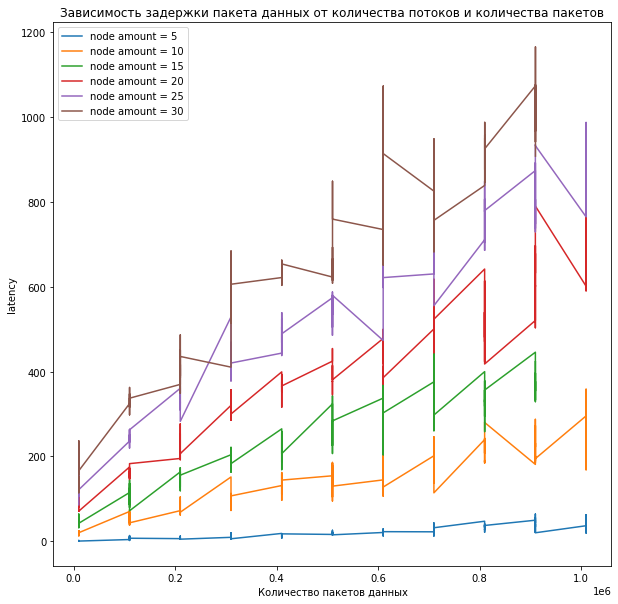

In [18]:
draw_latency(df_opt2)

Произошла оптимизация работы программы для достаточно большого количества потоков и небольшой загрузки сети (кол-во пакетов в сети менее 100000).

Отрисуем графики для малой загрузки сети (100000 пакетов), положим количество пакетов равным 20.

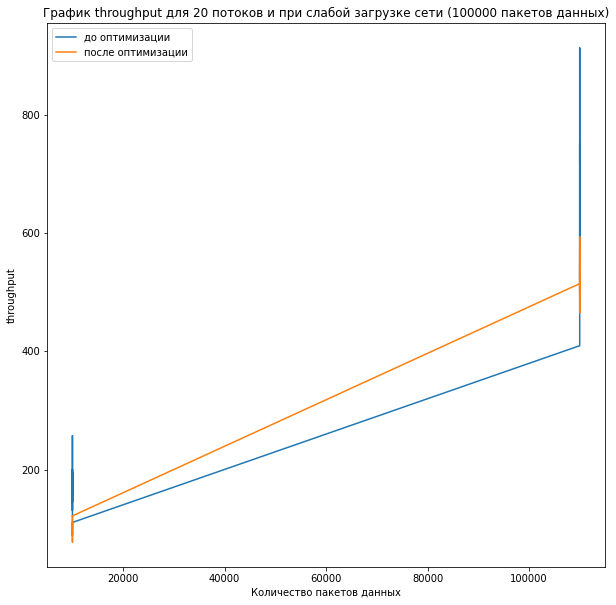

In [80]:
plt.figure(figsize=(10, 10))
part = df_opt1.loc[df_opt1["nodesAmount"] == 20].sort_values(by="dataAmount").loc[df_opt1["dataAmount"] <= 200000]
plt.plot(part.dataAmount, part.throughput, label = "до оптимизации")
part_opt = df_opt2.loc[df_opt2["nodesAmount"] == 20].sort_values(by="dataAmount").loc[df_opt2["dataAmount"] <= 200000]
plt.plot(part_opt.dataAmount, part_opt.throughput, label = "после оптимизации")
plt.title("График throughput для 20 потоков и при слабой загрузке сети (100000 пакетов данных)")
plt.xlabel("Количество пакетов данных")
plt.ylabel("throughput")
plt.legend()
plt.show()

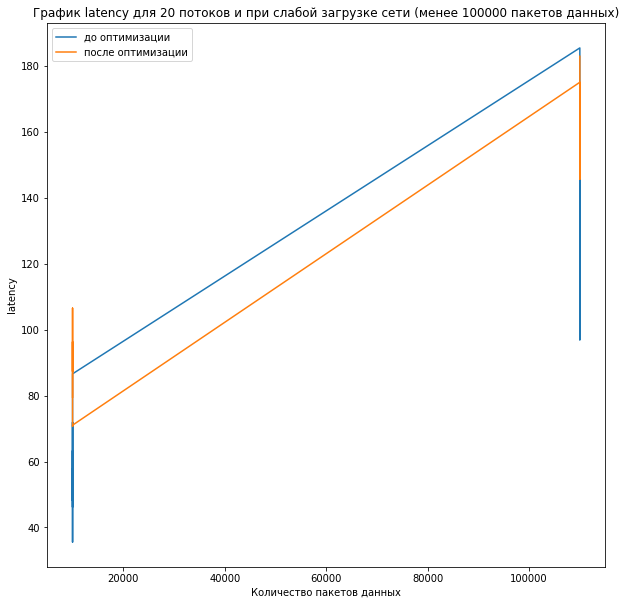

In [79]:
plt.figure(figsize=(10, 10))
part = df_opt1.loc[df_opt1["nodesAmount"] == 20].sort_values(by="dataAmount").loc[df_opt1["dataAmount"] <= 200000]
plt.plot(part.dataAmount, part.latency, label = "до оптимизации")
part_opt = df_opt2.loc[df_opt2["nodesAmount"] == 20].sort_values(by="dataAmount").loc[df_opt2["dataAmount"] <= 200000]
plt.plot(part_opt.dataAmount, part_opt.latency, label = "после оптимизации")
plt.title("График latency для 20 потоков и при слабой загрузке сети (менее 100000 пакетов данных)")
plt.xlabel("Количество пакетов данных")
plt.ylabel("latency")
plt.legend()
plt.show()

На представленных выше графиках пропускная способность увеличилась после оптимизации, а задержка пакетов уменьшилась.

**Наблюдение 3:**

Результаты работы программы для большой загрузки сети после 2-ой оптимизации ухудшились. 

**Оптимизация 3:**

Попробуем убрать LinkedBlockingQueue, вместо него будем использовать LinkedList,  механизм синхронизации будем моделировать с помощью condvar. 


Построим графики для резулььтатов запуска после оптимизации.

In [81]:
df_opt3 = pd.read_table('dataopt3.txt', sep=' ')


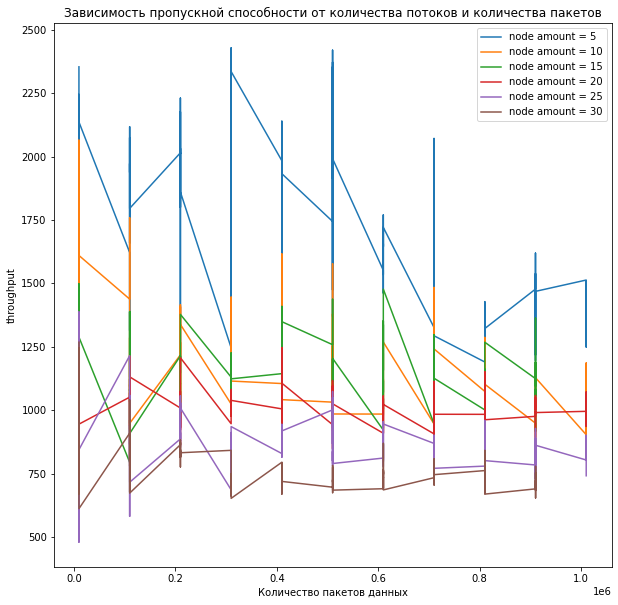

In [82]:
draw_throughput(df_opt3)

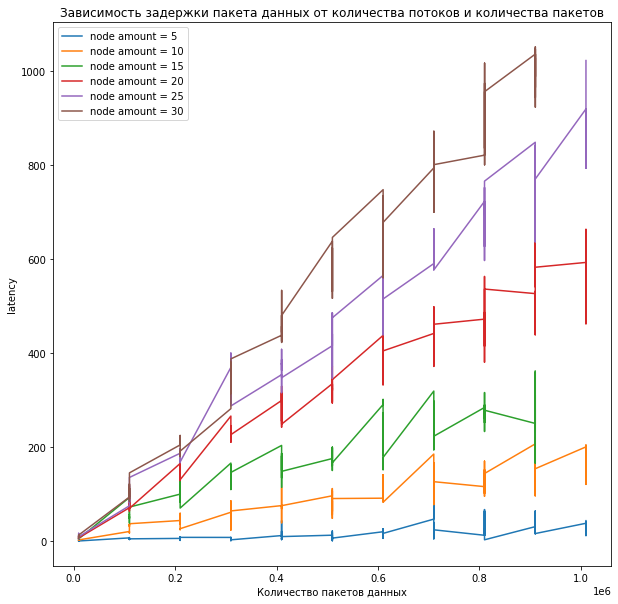

In [83]:
draw_latency(df_opt3)

Заметим, что с ростом числа пакетов пропускная способность падает, а задержка пакета в сети увеличивается.

Для большей наглядности и возможности оценить результаты оптимизации зафиксируем число потоков и отрисуем результаты до оптимизации и после на одном графике.


Начнем с построения графиков для throughput.


In [84]:
def draw_opt_and_notopt_throughput(threads_num, df, df_opt):
  plt.figure(figsize=(10, 10))
  part = df.loc[df["nodesAmount"] == threads_num].sort_values(by="dataAmount")
  plt.plot(part.dataAmount, part.throughput, label = "до оптимизации")
  part_opt = df_opt.loc[df_opt["nodesAmount"] == threads_num].sort_values(by="dataAmount")
  plt.plot(part_opt.dataAmount, part_opt.throughput, label = "после оптимизации")
  plt.title("График throughput для " + str(threads_num) + " потоков")
  plt.xlabel("Количество пакетов данных")
  plt.ylabel("throughput")
  plt.legend()
  plt.show()

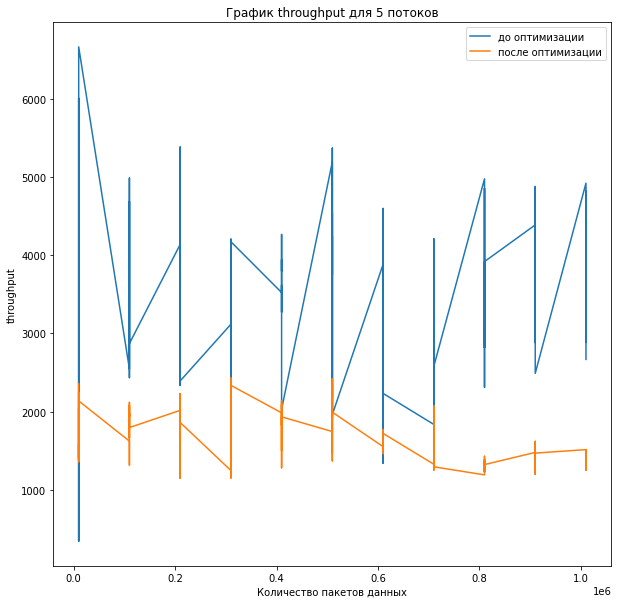

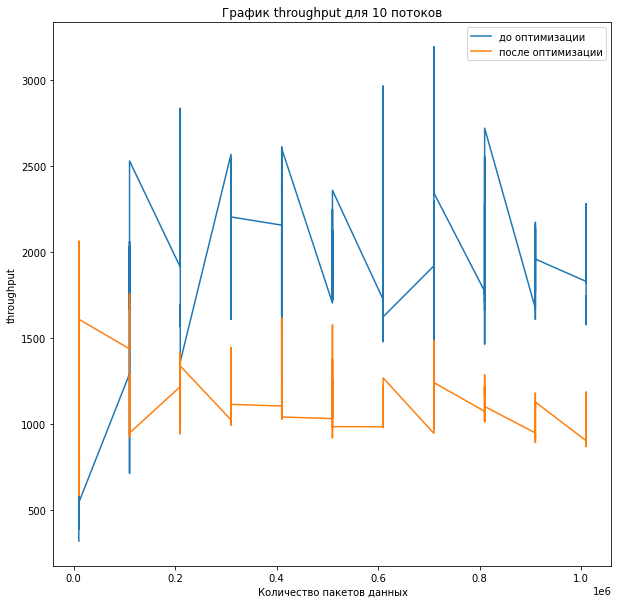

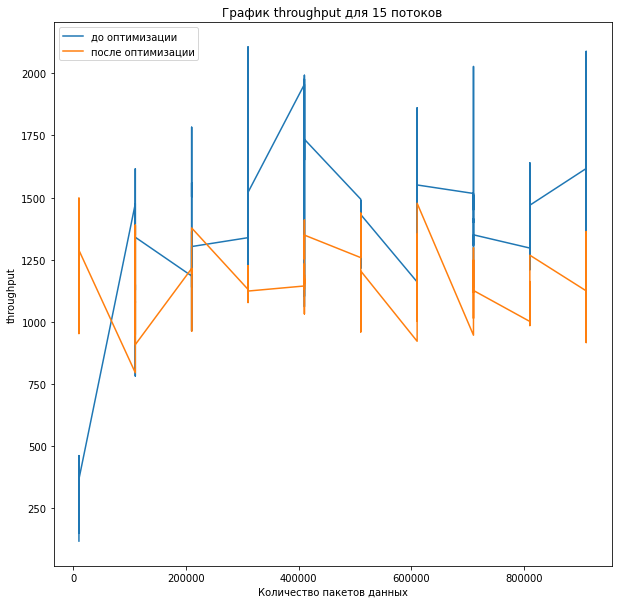

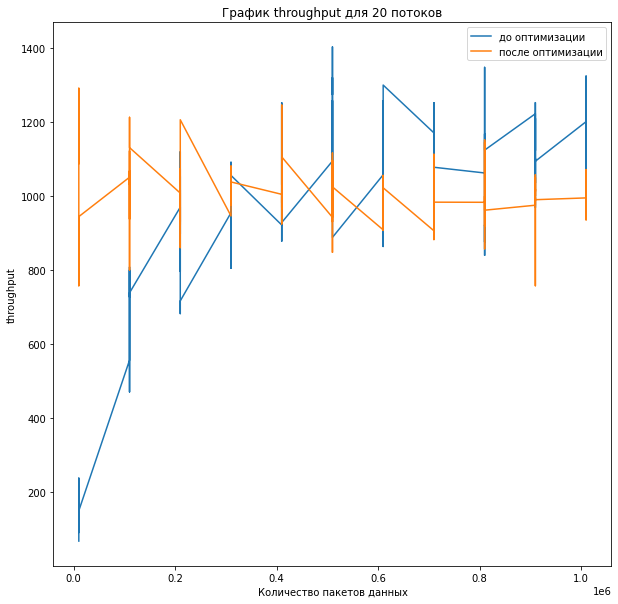

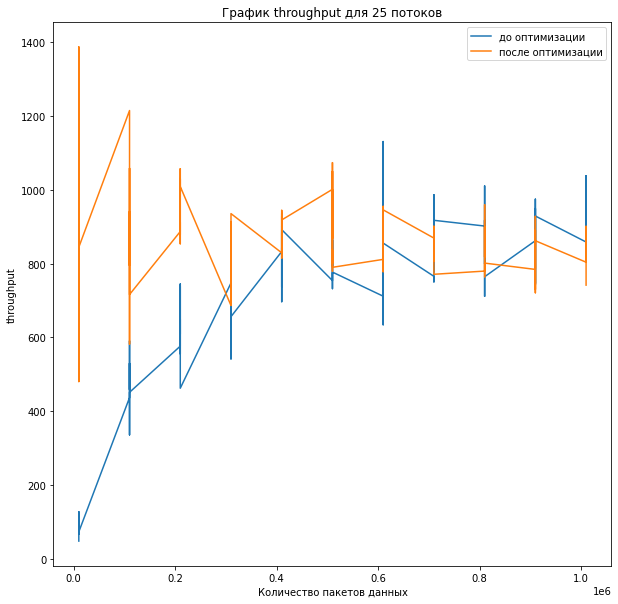

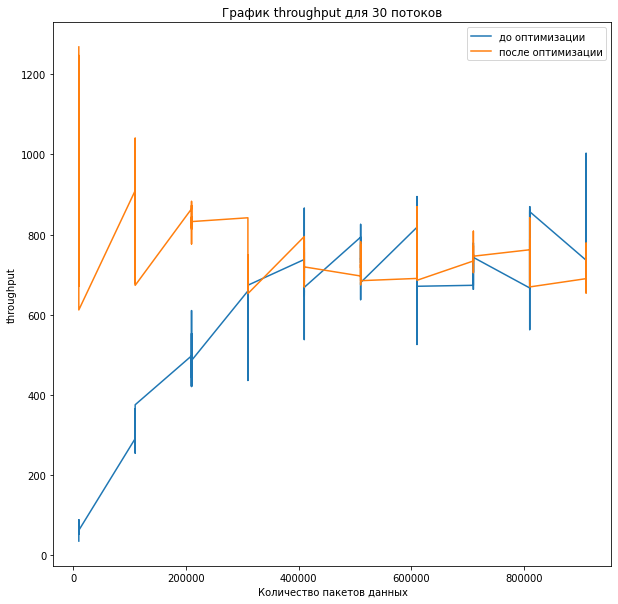

In [86]:
for amount in node_amount:
  draw_opt_and_notopt_throughput(amount, df, df_opt3)

Теперь отрисуем аналогичные графики для latency.

In [87]:
def draw_opt_and_notopt_latency(threads_num, df, df_opt):
  plt.figure(figsize=(10, 10))
  part = df.loc[df["nodesAmount"] == threads_num].sort_values(by="dataAmount")
  plt.plot(part.dataAmount, part.latency, label = "до оптимизации")
  part_opt = df_opt.loc[df_opt["nodesAmount"] == threads_num].sort_values(by="dataAmount")
  plt.plot(part_opt.dataAmount, part_opt.latency, label = "после оптимизации")
  plt.title("График latency для " + str(threads_num) + " потоков")
  plt.xlabel("Количество пакетов данных")
  plt.ylabel("latency")
  plt.legend()
  plt.show()

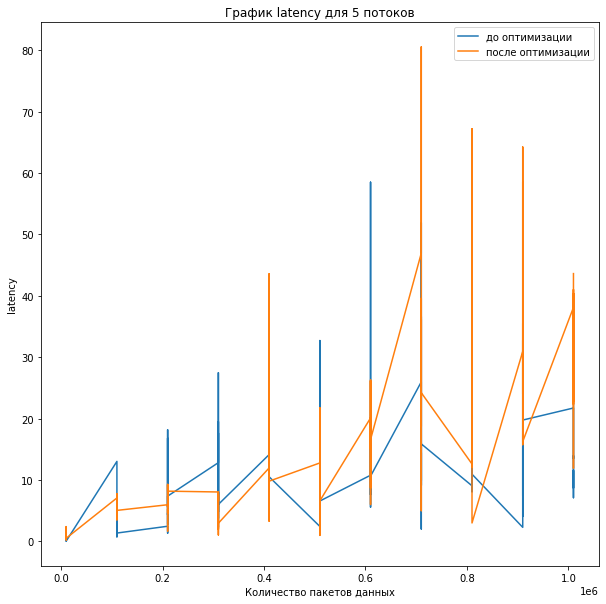

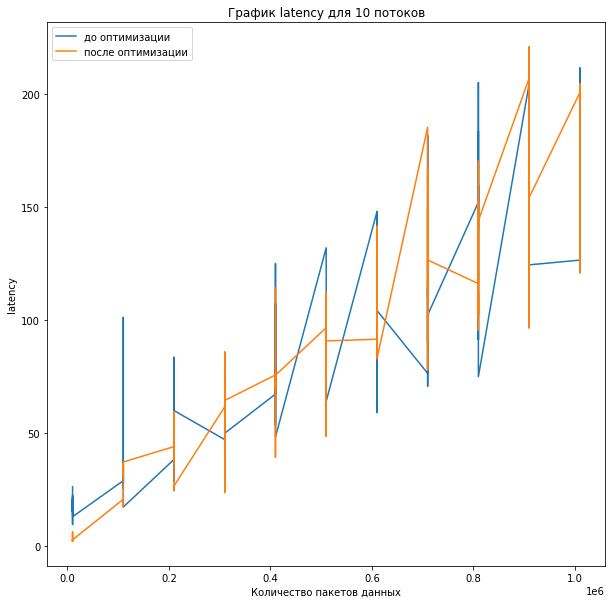

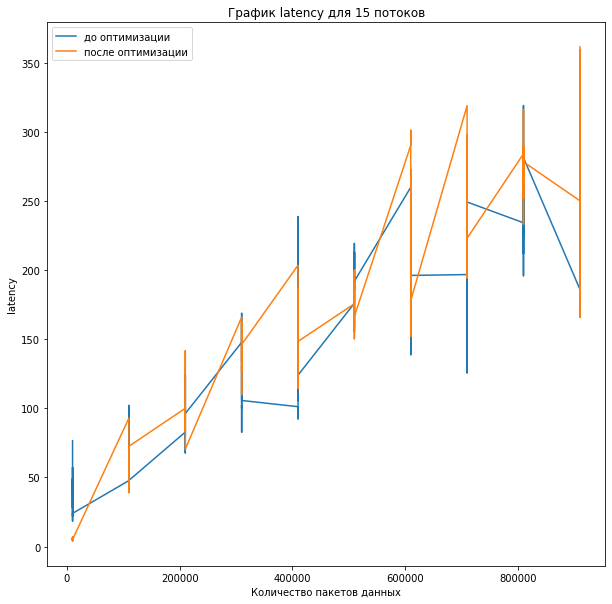

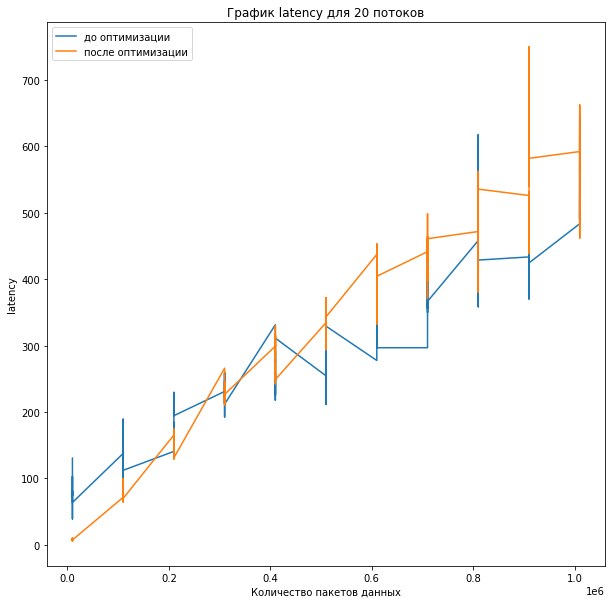

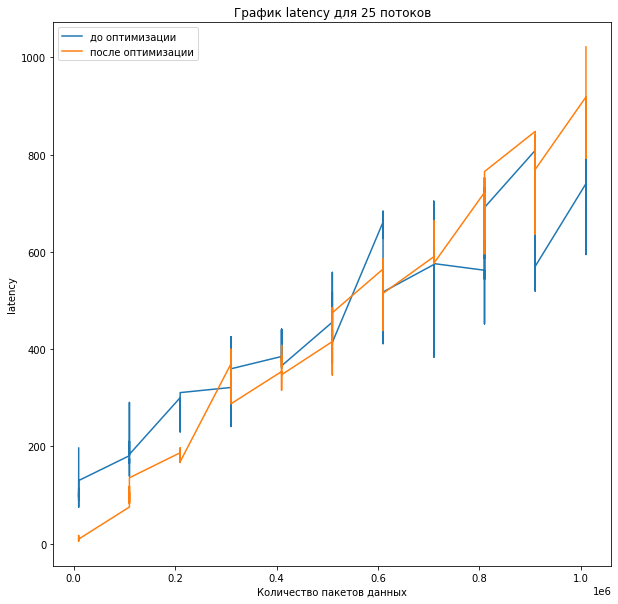

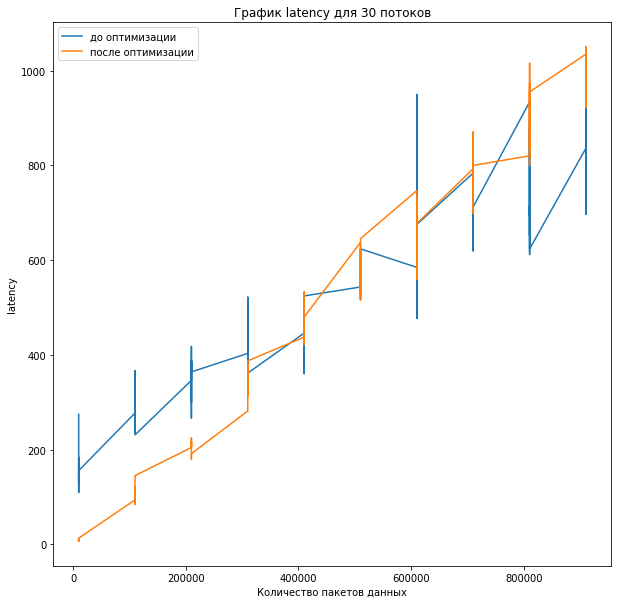

In [88]:
for amount in node_amount:
  draw_opt_and_notopt_latency(amount, df, df_opt3)

Заметим, что после проведения оптимизаций для большого числа потоков значения throughput - увеличилось, latency - уменьшилось при загрузке сети не превышающей 400000 пакетов.

### **Результаты**
* С ростом числа потоков в TokenRing пропускная способность падает, а задержка пакета данных растет.

* После проведения оптимизаций задержка уменьшилась, а пропускная способность увеличилась (для большого количества потоков и загрузки сети не превышающей 400000 пакетов)

* Throughput уменьшается при увеличении числа пакетов.

* Latency растет при увеличении числа пакетов.
